# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather["sys"]['country'] # YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | howrah
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | andkhoy
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | tralee
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | knyazhichi
Processing Record 14 of Set 1 | rusape
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | caibarien
Processing Record 17 of Set 1 | cruzeiro do sul
Processing Record 18 of Set 1 | chisec
Processing Record 19 of Set 1 | pathein
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | tual
Processing Record 22 of Set 1 | wailua homesteads
Processing Record 23 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,4.59,92,100,7.48,SJ,1691530563
1,howrah,22.5892,88.3103,27.00,94,75,2.06,IN,1691530594
2,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330
3,bethel,41.3712,-73.4140,26.20,63,40,5.14,US,1691530560
4,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691530355


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,4.59,92,100,7.48,SJ,1691530563
1,howrah,22.5892,88.3103,27.00,94,75,2.06,IN,1691530594
2,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330
3,bethel,41.3712,-73.4140,26.20,63,40,5.14,US,1691530560
4,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691530355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

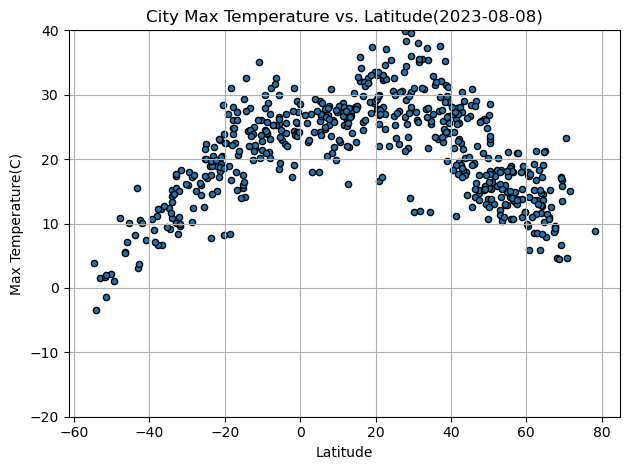

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat",y="Max Temp",grid=True,edgecolors='black')
today = date.today()
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title (f"City Max Temperature vs. Latitude({today})")
plt.ylim(-20,40)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

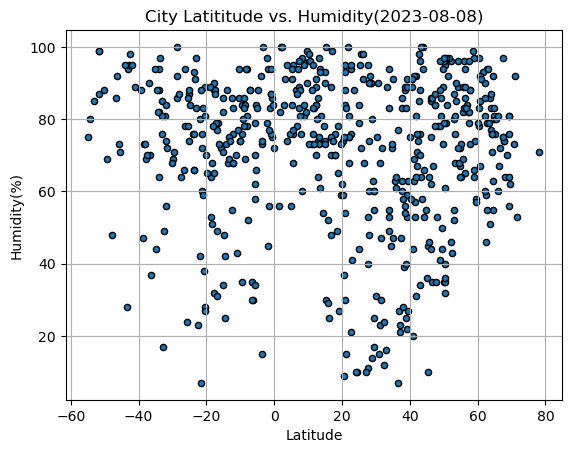

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", grid=True,edgecolors='black')
today = date.today()
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Humidity(%)")
plt.title(f"City Latititude vs. Humidity({today})")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

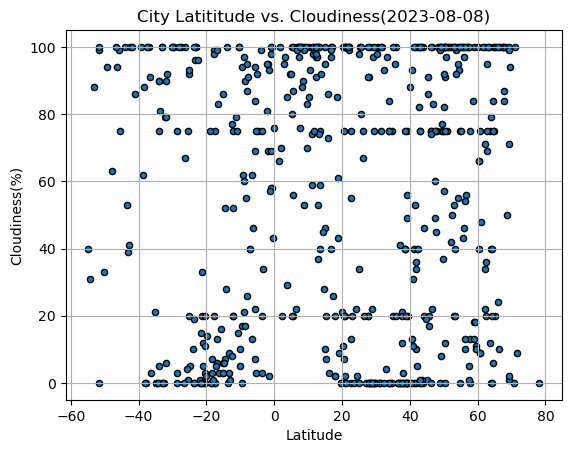

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", grid=True,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latititude vs. Cloudiness({today})")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

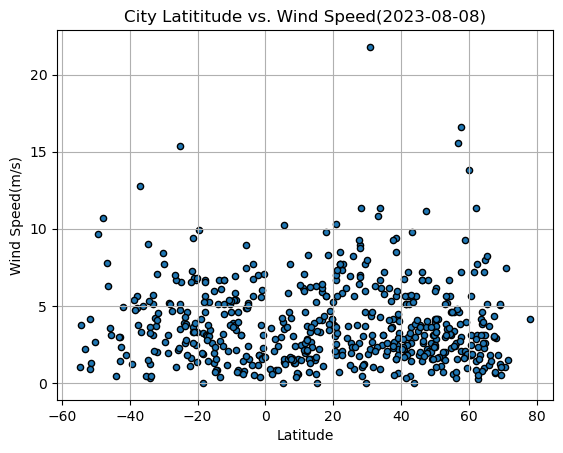

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", grid=True,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Latititude vs. Wind Speed({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_function(x,y):
    #get the linear regression equation and plot points
    (slope, intercept, r, p, se) = linregress(x,y)
    regress_value= x * slope + intercept
    line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {r}")
    
    #plot the data
    plt.scatter(x,y, color='blue')
    plt.plot(x, regress_value, color="red")
    plt.annotate(line_eq,(min(x+5),min(y+5)),fontsize= 15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(input("ylabel: "))
    plt.title(input("title: ")+ f' ({today})')
    plt.tight_layout()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,4.59,92,100,7.48,SJ,1691530563
1,howrah,22.5892,88.3103,27.00,94,75,2.06,IN,1691530594
2,tiksi,71.6872,128.8694,15.04,53,9,1.47,RU,1691530330
3,bethel,41.3712,-73.4140,26.20,63,40,5.14,US,1691530560
4,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691530355


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,atafu village,-8.5421,-172.5159,28.66,69,90,5.40,TK,1691530362
7,avarua,-21.2078,-159.7750,23.03,60,20,3.60,CK,1691530557
10,puerto ayora,-0.7393,-90.3518,28.98,86,58,3.13,EC,1691530292
11,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691530554
13,rusape,-18.5278,32.1284,8.30,64,0,1.85,ZW,1691530889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6655153901460342


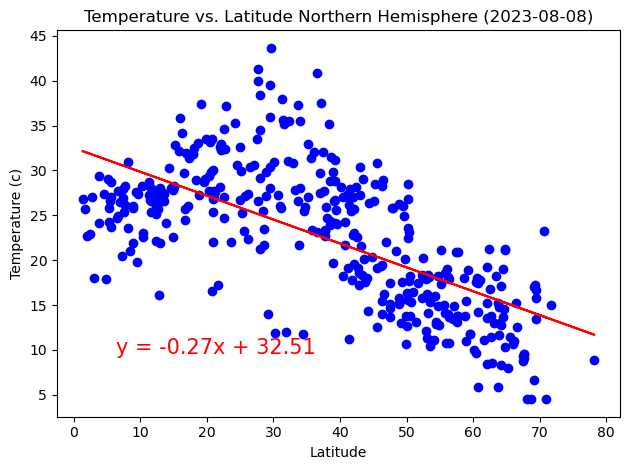

In [16]:
# Linear regression on Northern Hemisphere
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"])

The r-value is: 0.8456373572369663


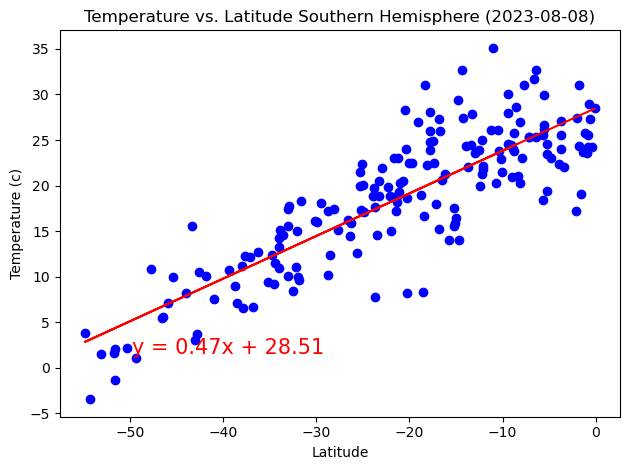

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** Both charts show a similar pattern where the temperature is colder the further the latitude is from the equator.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.010969644144537771


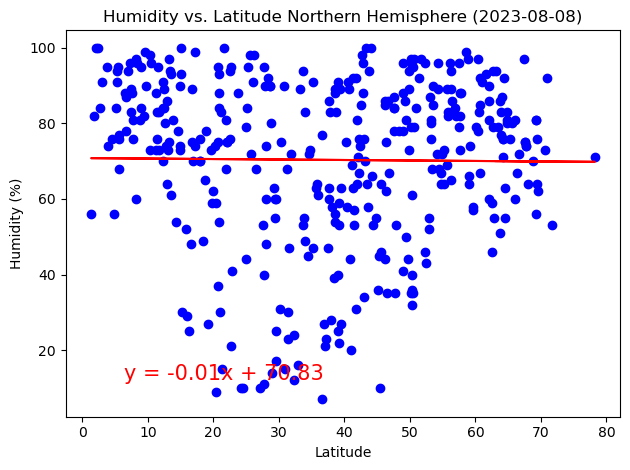

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Humidity"])

The r-value is: -0.11052110286253583


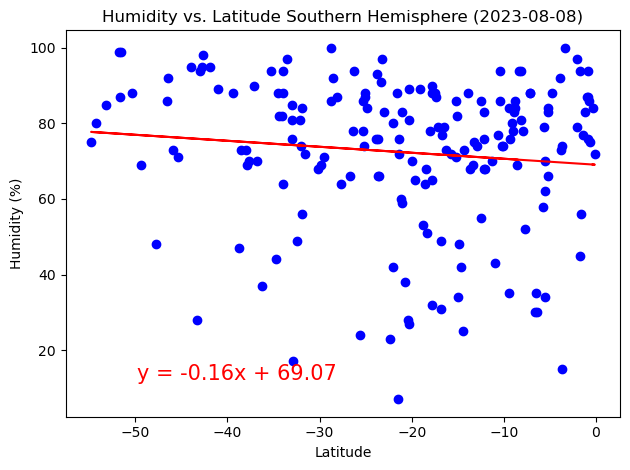

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a difference between the regression value for the northern hemisphere and the southern hemisphere.  While the has a more flat distribution showing that there is little correlation between the humidity and latitude, the southern hemisphere shows that there is more of link to humidity and the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07687310501067582


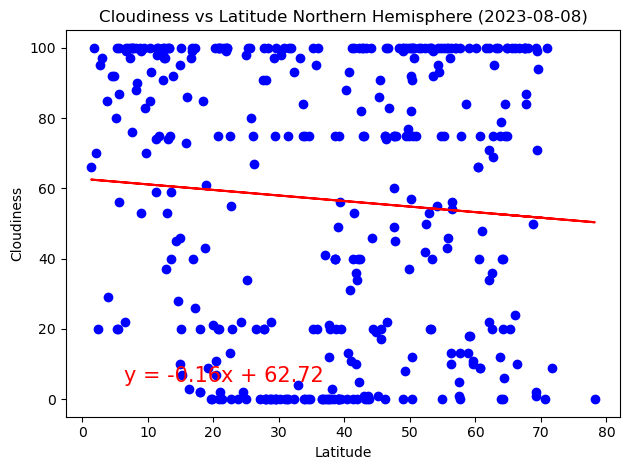

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"])

The r-value is: -0.08071576095834787


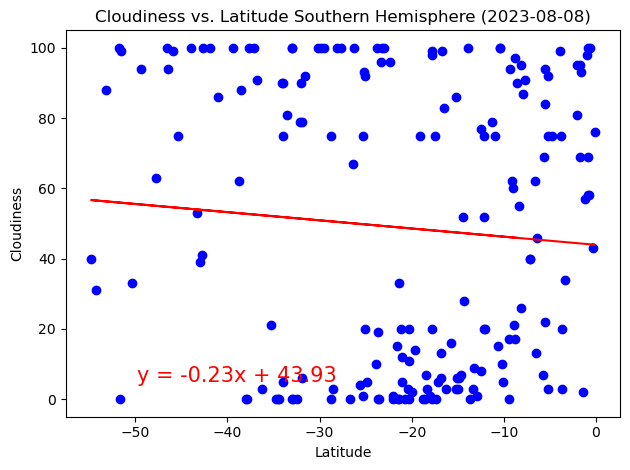

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** The data from the northern hemisphere is quite spreaed out as is shown in the regression line being so flat.  There are a lot of location locations that have iether full cloud coud or no cloud cover at all leading to a slightly negative regression value of -0.012.  The southern hemisphere has a slightly stronger negative correlation with a regression value -0.18. Overall the cloudiness of the cities of the data set is quite spreadout out and does not have much relation with the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01981419293531031


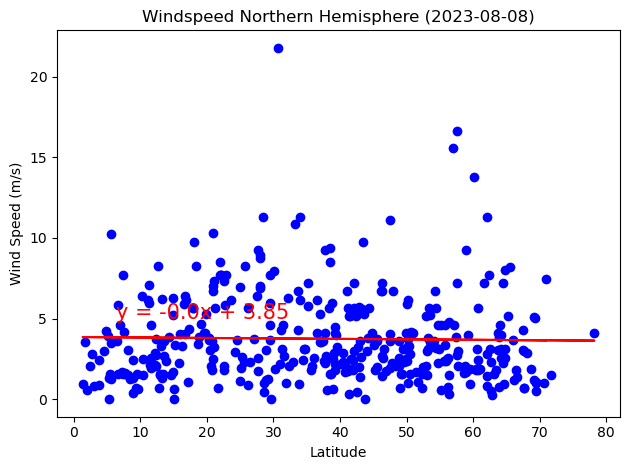

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"])

The r-value is: -0.06913224813669898


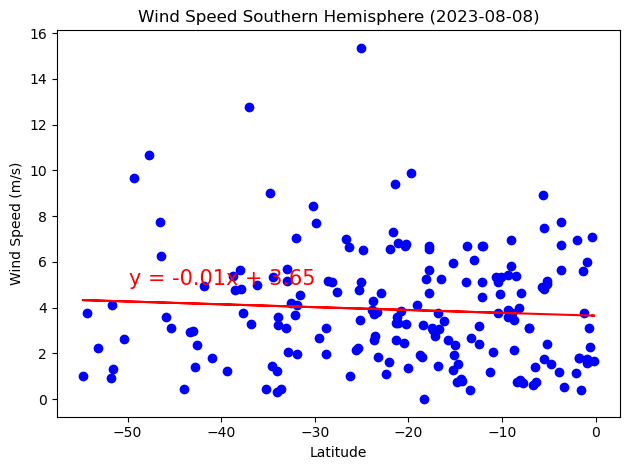

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is not a strong argument for their to be a correlation between the wind speed and latitude of the city.  Both have a slightly negative correlation with the northern hemisphere having a -0.189 regression value compared to the southern hemisphere's -0.031.